## Import functionality

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

## Playing the game

In [4]:
def initialize_setting_monty_hall():
    """
    Setting up the situation, using dictionary to have an index starting at 1.
    """
    doors = {
        1 : 'goat',
        2 : 'goat',
        3 : 'goat'
    }
    rand_num = random.random()
    door_with_car = int(rand_num * 3) + 1
    doors[door_with_car] = "car"
    return doors, door_with_car

def open_one_door(doors, door_with_car, choice):
    """
    Let Monty hall open one door, which is not the chosen door & not the door with a car!
    """
    doors_to_open = list({1, 2, 3}.difference({choice, door_with_car}))
    door_to_open = random.choice(doors_to_open)
    unopened_doors = list({1, 2, 3}.difference({door_to_open}))
    return unopened_doors, door_to_open

In [5]:
doors, door_with_car = initialize_setting_monty_hall()
# Let the user make a random choice and find out which door Monty Hall can open.
choice = int(input("Which door would you like to choose (1, 2 or 3)?\n"))
unopened_doors, door_to_open = open_one_door(doors, door_with_car, choice)

# Propose the new choice and let the user know if he won.
new_choice = int(input(f"There is a goat behind door {door_to_open}, would you like to choose a new door, type {unopened_doors[0]} or {unopened_doors[1]}"))

if new_choice == door_with_car:
    print(f"Congratsulations, you won a car!")
else:
    print(f"Oh no, you got a goat..")

Which door would you like to choose (1, 2 or 3)?
1
There is a goat behind door 3, would you like to choose a new door, type 1 or 22
Congratsulations, you won a car!


## Automatic simulation of both strategies

In [8]:
## Additional Parameters
num_iterations = 10 ** 3

In [9]:
def simulate_monty_hall(strategy, num_iterations):
    """
    Simulate the Monty Hall problem with the specified strategy and number of iterations.

    Parameters:
        strategy (str): The strategy to use, either 'switch' or 'stay'.
        num_iterations (int): The number of iterations to run the simulation.

    Returns:
        list: A list of outcomes, where each element represents the prize behind the chosen door
              for each iteration of the simulation.

    The Monty Hall problem is a probability puzzle where a contestant is presented with three doors,
    behind one of which is a car, and behind the other two are goats. The contestant makes an initial
    choice of one door. Then, the host (Monty Hall) reveals one of the other two doors with a goat behind it.
    The contestant can choose to stick with their initial choice ('stay') or switch to the other unopened door ('switch').
    This function simulates the Monty Hall problem with the specified strategy and records the outcomes.

    Example usage:
    >>> simulate_monty_hall('switch', 1000)
    ['goat', 'car', 'car', 'goat', 'goat', ...]  for 1000 iterations with 'switch' strategy.
    """
    prizes = list()
    for _ in range(num_iterations):
        doors, door_with_car = initialize_setting_monty_hall()
        choice = int(random.random() * 3 + 1)
        unopened_doors, door_to_open = open_one_door(doors, door_with_car, choice)
        if strategy == 'switch':
            behind_door = doors[list({1, 2, 3}.difference({choice, door_to_open}))[0]]
        else:
            behind_door = doors[choice]
        prizes.append(behind_door)
    return prizes

#### Perform the simulation

In [10]:
prizes = dict()

for strategy in ['switch', 'stick']:
    prizes[strategy] = simulate_monty_hall(strategy, num_iterations)
    prizes[strategy] = [prize == 'car' for prize in prizes[strategy]]

#### Visualize results

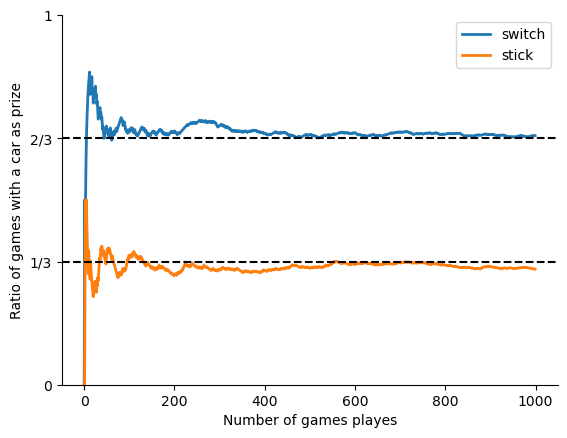

In [11]:
fig, ax = plt.subplots()
for strategy in ['switch', 'stick']:
    ax.plot(np.cumsum(prizes[strategy]) / np.arange(1, len(prizes[strategy]) + 1), label = strategy, lw = 2)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim([0, 1])
ax.set_xlabel("Number of games playes")
ax.set_ylabel("Ratio of games with a car as prize")
ax.axhline(1/3, color = 'k', ls = '--')
ax.axhline(2/3, color = 'k', ls = '--')
ax.set_yticks([0, 1/3, 2/3, 1])
ax.set_yticklabels([0, '1/3', '2/3', 1])
ax.legend();